<a href="https://colab.research.google.com/github/nnilayy/Unet/blob/main/Polygon2Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from skimage import draw

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!mkdir "/content/drive/MyDrive/Bitmaps"

In [10]:
!unzip -q /content/Images.zip -d /content/

## Extracting the shape of the images

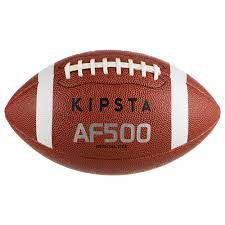

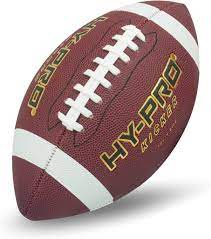

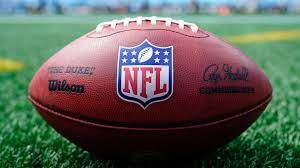

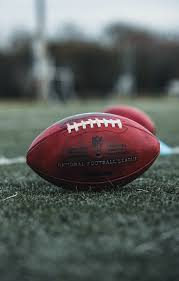

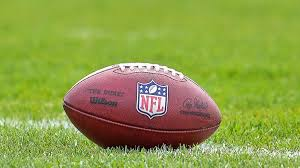

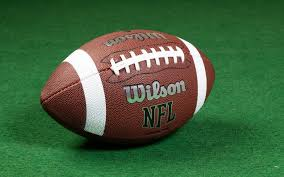

[(225, 225), (239, 211), (168, 300), (281, 179), (168, 300), (177, 284)]

In [19]:
from google.colab.patches import cv2_imshow
import glob
import os
import numpy as np
import cv2

images=sorted(glob.glob("/content/Images/*"))
image_shapes=[]
for image in images:
  image=cv2.imread(image)
  image=np.array(image)
  width,height,_=image.shape
  cv2_imshow(image)
  image_shapes.append((width,height))
image_shapes


## Extracting the X_coordinates and y_coordinates of all images 

In [20]:
import json
with open('/content/Balls_Polygon.json', 'r') as f:
  file = json.load(f)
x=[]
y=[]
for i in file:
 x.append(file[str(i)]["regions"]["0"]["shape_attributes"]['all_points_x'])
 y.append(file[str(i)]["regions"]["0"]["shape_attributes"]['all_points_y'])
print(x)
print(y)

[[41.12474050812208, 37.30047210729441, 35.63774671563021, 31.647205775636124, 28.321754992307717, 23.33357881731511, 17.5140399464904, 13.190953928163474, 10.031775684001488, 5.209872048175301, 4.045964274010359, 4.378509352343199, 6.706324900673083, 18.012857563989662, 24.33121405231363, 33.47620370646675, 41.457285586454915, 50.269730162275195, 55.75672395476706, 68.72598200974784, 77.37215404640169, 88.17986909221901, 96.49349605054003, 104.97339554802745, 115.11602043717909, 129.58173134465767, 137.72908576381226, 147.87171065296388, 163.83387441294022, 178.13331278125239, 193.7629314628959, 206.06709936121098, 211.72036569286928, 217.20735948536114, 221.0316278861888, 219.53517503369102, 215.71090663286336, 205.23573666537888, 199.91501541205344, 195.25938431539367, 189.7723905229018, 186.11439466124054, 175.97176977208892, 165.1640547262716, 156.85042776795058, 153.52497698462219, 145.3776225654676, 140.22317385130856, 134.40363498048384, 125.9237354829964, 108.46511887052229, 1

## Drawing masks

In [21]:
def mask(x, y, shape):
    row_fill, col_fill = draw.polygon(x, y, shape)
    mask = np.zeros(shape, dtype=np.bool)
    mask[row_fill,col_fill] = True
    return mask*255

<ipython-input-21-cc6621acba72>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(shape, dtype=np.bool)


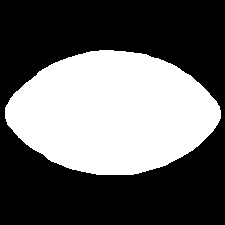

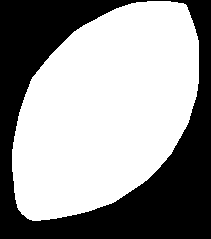

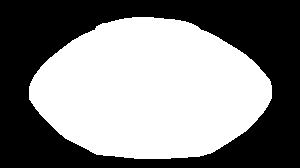

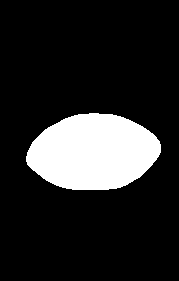

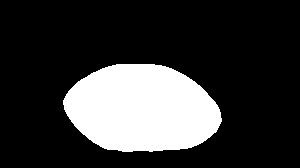

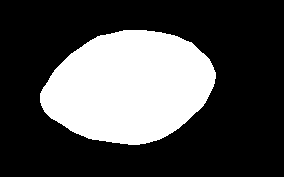

In [22]:
from google.colab.patches import cv2_imshow
import cv2
import os
img=[]
for i,shape in zip(range(len(x)),image_shapes):
  bw=mask(y[i],x[i],shape)
  img.append(bw)
  cv2.imwrite("/content/drive/MyDrive/Bitmaps/"+str(i+1)+".jpeg",bw)
  cv2_imshow(bw)

In [ ]:
# image=[]
# for i in range(len(x)):
#   image.append([])
#   for j in range(len(x[i])):
#     image[i].append((x[i][j],y[i][j]))
# image
# for a in range(len(x)):

# x_coordinates=[]
# for i in range(len(x)):
#   for j in range(len(x[i])):
#     x_coordinates.append(x[i][j])
# print(len(x_coordinates))

# y_coordinates=[]
# for i in range(len(x)):
#   for j in range(len(x[i])):
#     y_coordinates.append(x[i][j])
# print(len(y_coordinates))


# x_coordinates=[]
# y_coordinates=[]
# polygon=[]
# for i in zip(range(len(x))):
#   for j in zip(range(len(x[i]))):
#     x_coordinates.append(x[i][j])
#     y_coordinates.append(y[i][j])

# for x,y in zip(x_coordinates,y_coordinates):
#   c=(x,y)
#   polygon.append(c)
# polygon

# a=file["1.jpeg"]["regions"]["0"]["shape_attributes"]['all_points_x']
# b=file["1.jpeg"]["regions"]["0"]["shape_attributes"]['all_points_y']
# print(a)
# print(b)

# x=sum(x, [])
# y=sum(y, [])

In [ ]:
# if the opening and closing brackets are {} we can use string indexes, otherwise if we the opening and closing brackets are [], we use integer index

In [ ]:
# import json
# person = '{"name": "Bob", "languages": ["Python", "Java","Loda","Lehsun"]}'

# person = '{"name": "Bob", "languages": ["English", "French"]}'
# person_dict = json.loads(person)

# Output: {'name': 'Bob', 'languages': ['English', 'French']}
# print( person_dict)

# Output: ['English', 'French']
# print(person_dict['languages'])